In [1]:
# system information
import os
from glob import glob

# computing 
import numpy as np
import pandas as pd
from datetime import datetime
import scipy as sp
import scipy.optimize as op
import statistics 
import seaborn as sns
from random import uniform, seed, random
# plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
%matplotlib inline

# ROOT files handling
import uproot as ur
import ROOT
from coffea.nanoevents import NanoEventsFactory, BaseSchema

Welcome to JupyROOT 6.26/06


In [2]:
# define ticks
def set_ticks(ax, xMaj, yMaj):
    ax.xaxis.set_major_locator(MultipleLocator(xMaj))
    ax.yaxis.set_major_locator(MultipleLocator(yMaj))
    ax.minorticks_on()
    ax.tick_params(which='major', width=1.0, length=8, direction='in', labelsize=14)
    ax.tick_params(which='minor', width=1.0, length=4, direction='in', labelsize=14)
    ax.yaxis.get_offset_text().set_fontsize(14)
    ax.xaxis.get_offset_text().set_fontsize(14)

sns.set(style = 'white')
mpl.rc('xtick.minor', visible = True)
mpl.rc('ytick.minor', visible = True)
mpl.rc('xtick', direction='in', top=True, bottom = True)
mpl.rc('ytick', direction='in', right=True, left = True)

## Baseline MC

Let's calculate the mean baseline we found during data taking:
- Total number of events: 253946 
- Total acquisition time: 1118820 seconds
- Rate: 0.23 Hz
- We calculate the baseline in the [1300-2048] channel range
- Mean Baseline: 6.63 counts 

In [3]:
# seconds in one week
seconds_week = 7 * 24 * 3600
# how many weeks of acquisition?
weeks = 1118820 / seconds_week
bs_weeks = 6.628571428571429
# baseline in one week
bs_one_week = bs_weeks/(weeks)

print("Mean baseline per week is: %1.4f counts" % bs_one_week)

Mean baseline per week is: 3.5832 counts


So, we want to simulate $B_{week} \times \Delta ch$ random numbers, where $\Delta ch$ is the width of the interval in which we are sampling our data points. 
- First we'll use the whole dynamic range, hence $\Delta ch = ch_f - ch_i = 2048 - 0 (\text{or}~180) = 2048$, then we'll reduce the interval only to the area in which the spectrum is actually affected by the baseline only, i.e., $\Delta ch = ch_f - ch_i = 2048 - 1300 = 748$

In [4]:
tree_1w_r1 = NanoEventsFactory.from_root('root_files/baseline_1w_range1.root', schemaclass = BaseSchema, treepath='bs_1week').events()
tree_1w_r2 = NanoEventsFactory.from_root('root_files/baseline_1w_range2.root', schemaclass = BaseSchema, treepath='bs_1week').events()
tree_2w_r1 = NanoEventsFactory.from_root('root_files/baseline_2w_range1.root', schemaclass = BaseSchema, treepath='bs_2week').events()
tree_2w_r2 = NanoEventsFactory.from_root('root_files/baseline_2w_range2.root', schemaclass = BaseSchema, treepath='bs_2week').events()
tree_3w_r1 = NanoEventsFactory.from_root('root_files/baseline_3w_range1.root', schemaclass = BaseSchema, treepath='bs_3week').events()
tree_3w_r2 = NanoEventsFactory.from_root('root_files/baseline_3w_range2.root', schemaclass = BaseSchema, treepath='bs_3week').events()

bs_1w, bs_2w, bs_3w = 4., 8., 12.

labels = ['Mean value', '$\chi^2$', '$\chi^2_p$', 'Likelihood']

## ONE WEEK

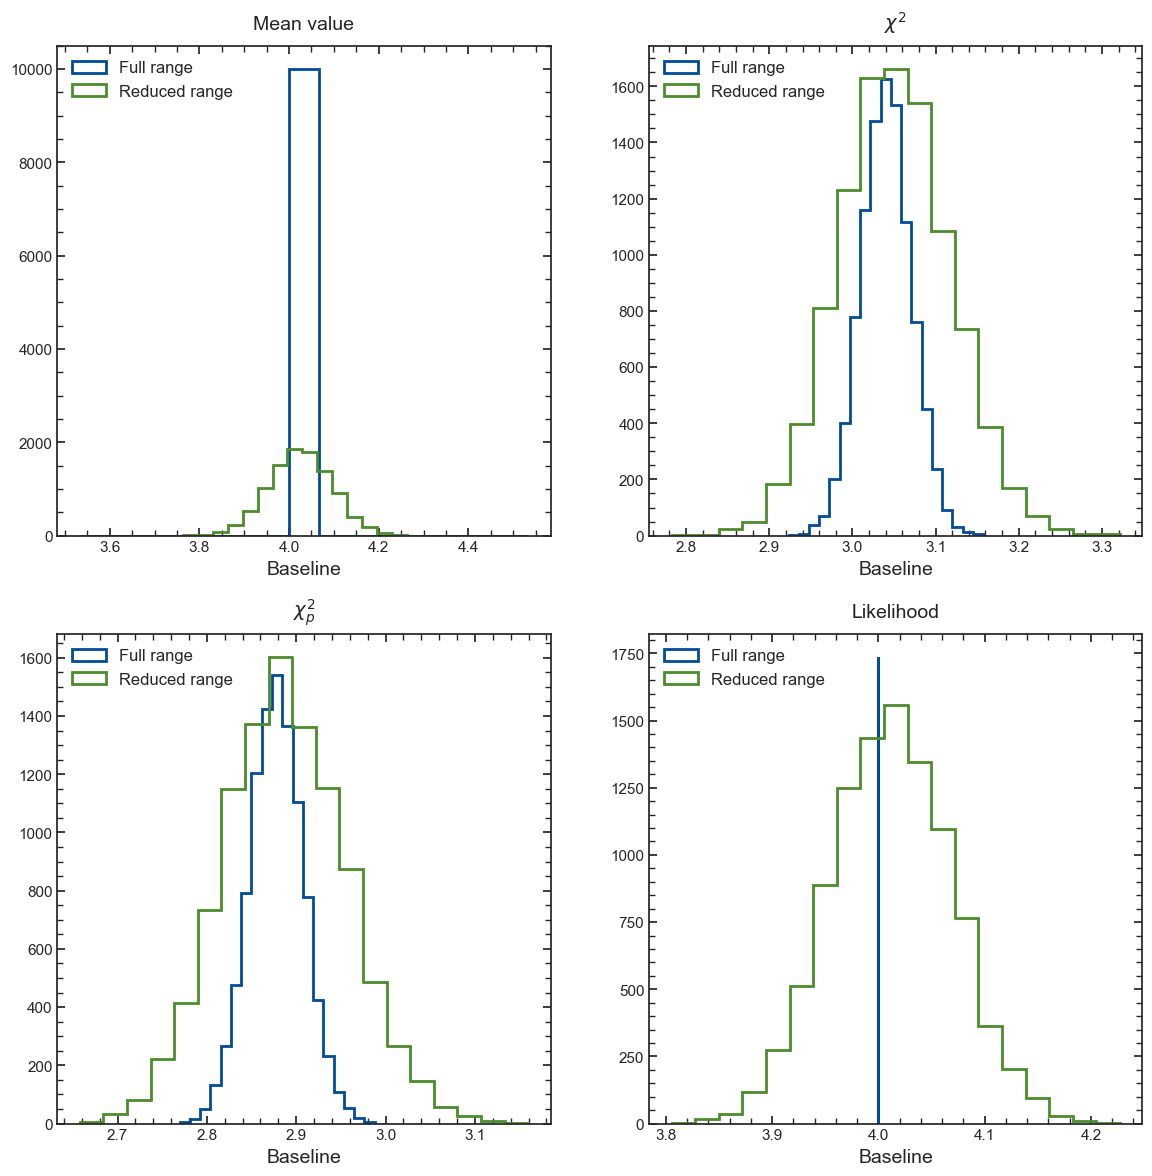

In [11]:
fig, ax = plt.subplots(2, 2, figsize = (14,14))


ax[0,0].hist(tree_1w_r1.bs_mean, bins=15, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'right',  label = 'Full range')
ax[0,1].hist(tree_1w_r1.bs_chi, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'right', label = 'Full range')
ax[1,0].hist(tree_1w_r1.bs_chip, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'right', label = 'Full range')
ax[1,1].hist(tree_1w_r1.bs_LL, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'right', label = 'Full range')


ax[0,0].hist(tree_1w_r2.bs_mean, bins=15, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'right',  label = 'Reduced range')
ax[0,1].hist(tree_1w_r2.bs_chi, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'right', label = 'Reduced range')
ax[1,0].hist(tree_1w_r2.bs_chip, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'right', label = 'Reduced range')
ax[1,1].hist(tree_1w_r2.bs_LL, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'right', label = 'Reduced range')


for i in range(0,2):
    for j in range(0,2):
        ax[i,j].set_xlabel("Baseline", fontsize=14)
        ax[i,j].legend(loc='upper left', frameon=False, fontsize=12)

#set_ticks(ax[0,0], 0.005, 2000)
#set_ticks(ax[0,1], 0.1, 2000)
#set_ticks(ax[1,0], 0.1, 2000)
#set_ticks(ax[1,1], 0.000005, 2000)

ax[1,1].ticklabel_format(axis='x', style='sci', scilimits=(-5,0))

ax[0,0].set_title(labels[0], fontsize = 14, pad = 12)
ax[0,1].set_title(labels[1], fontsize = 14, pad = 12)
ax[1,0].set_title(labels[2], fontsize = 14, pad = 12)
ax[1,1].set_title(labels[3], fontsize = 14, pad = 12)

#fig.savefig("1week_bs.pdf")
plt.show()

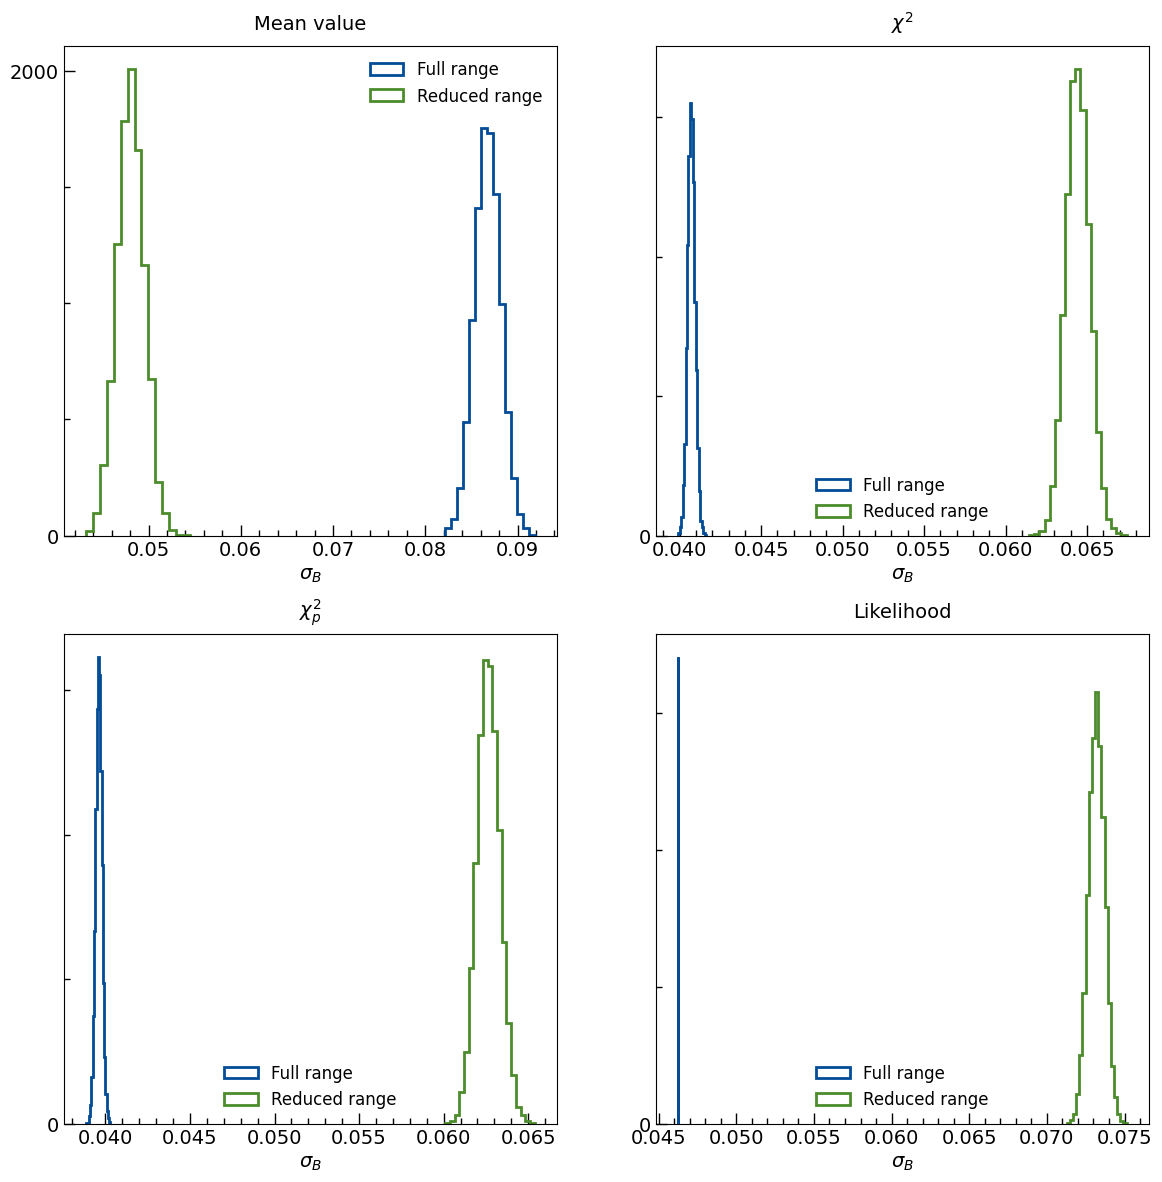

In [6]:
fig, ax = plt.subplots(2, 2, figsize = (14,14))

ax[0,0].hist(tree_1w_r1.bs_mean_err, bins=15, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'right',  label = 'Full range')
ax[0,1].hist(tree_1w_r1.bs_chi_err, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'right', label = 'Full range')
ax[1,0].hist(tree_1w_r1.bs_chip_err, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'right', label = 'Full range')
ax[1,1].hist(tree_1w_r1.bs_LL_err, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'right', label = 'Full range')


ax[0,0].hist(tree_1w_r2.bs_mean_err, bins=15, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'right',  label = 'Reduced range')
ax[0,1].hist(tree_1w_r2.bs_chi_err, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'right', label = 'Reduced range')
ax[1,0].hist(tree_1w_r2.bs_chip_err, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'right', label = 'Reduced range')
ax[1,1].hist(tree_1w_r2.bs_LL_err, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'right', label = 'Reduced range')


for i in range(0,2):
    for j in range(0,2):
        ax[i,j].set_xlabel("$\sigma_B$", fontsize=14)
        ax[i,j].legend(loc='best', frameon=False, fontsize=12)

set_ticks(ax[0,0], 0.01, 2000)
set_ticks(ax[0,1], 0.005, 2000)
set_ticks(ax[1,0], 0.005, 2000)
set_ticks(ax[1,1], 0.005, 2000)

ax[1,1].ticklabel_format(axis='x', style='sci', scilimits=(-5,0))

ax[0,0].set_title(labels[0], fontsize = 14, pad = 12)
ax[0,1].set_title(labels[1], fontsize = 14, pad = 12)
ax[1,0].set_title(labels[2], fontsize = 14, pad = 12)
ax[1,1].set_title(labels[3], fontsize = 14, pad = 12)

fig.savefig("1week_sigmabs.pdf")
plt.show()


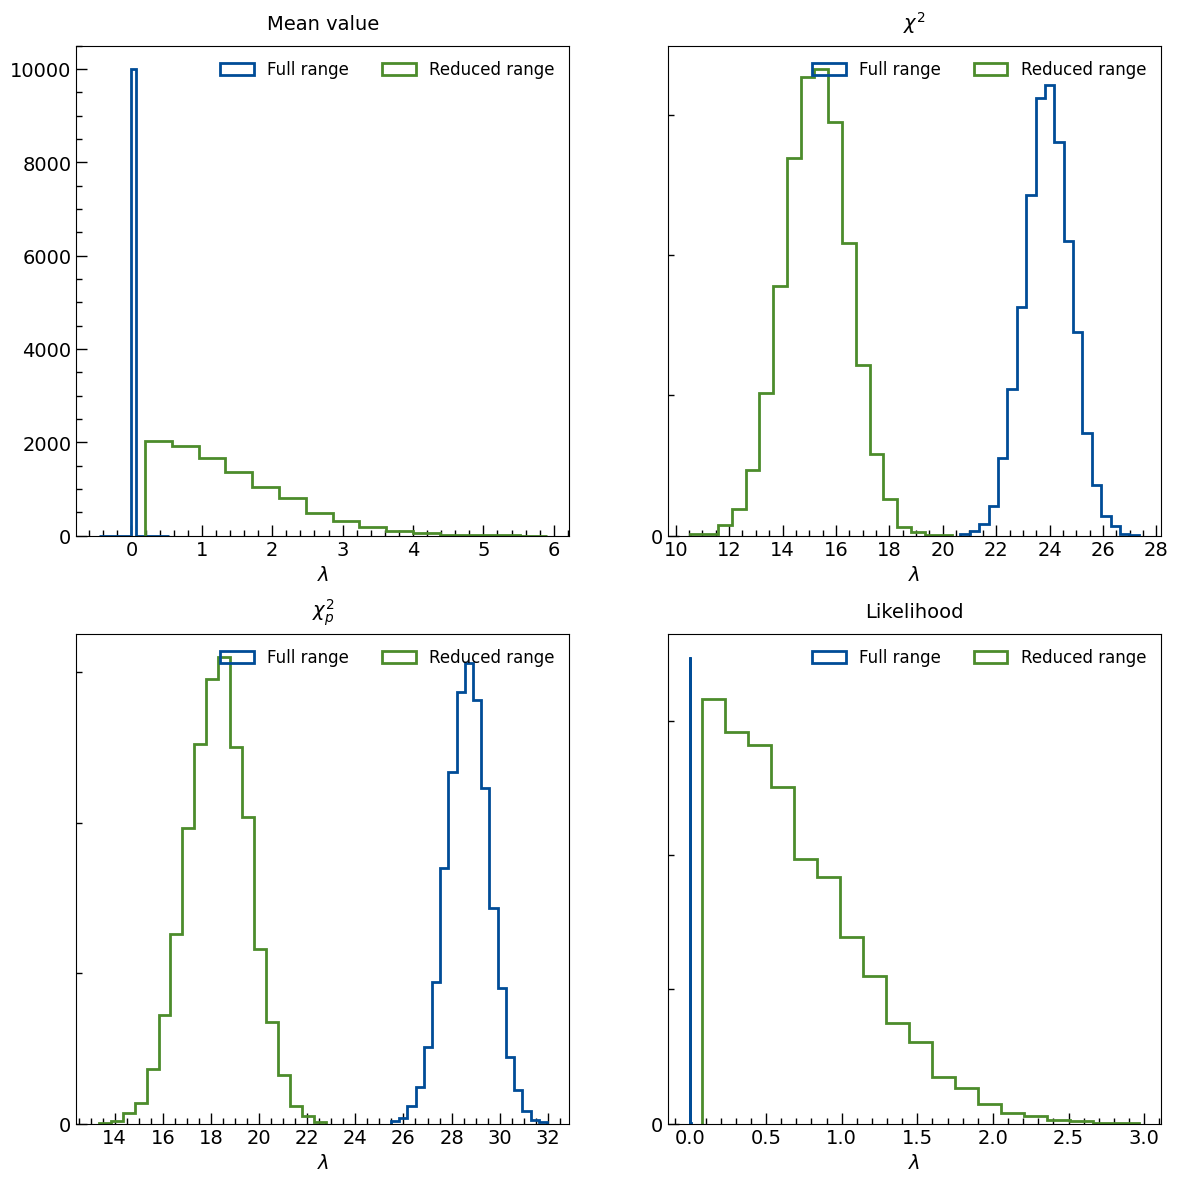

In [7]:
fig, ax = plt.subplots(2, 2, figsize = (14,14))

ax[0,0].hist(tree_1w_r1.delta_mean, bins=15, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'right',  label = 'Full range')
ax[0,1].hist(tree_1w_r1.delta_chi, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'right', label = 'Full range')
ax[1,0].hist(tree_1w_r1.delta_chip, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'right', label = 'Full range')
ax[1,1].hist(tree_1w_r1.delta_L, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'right', label = 'Full range')


n, bins, _ = ax[0,0].hist(tree_1w_r2.delta_mean, bins=15, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'right',  label = 'Reduced range')
ax[0,1].hist(tree_1w_r2.delta_chi, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'right', label = 'Reduced range')
ax[1,0].hist(tree_1w_r2.delta_chip, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'right', label = 'Reduced range')
ax[1,1].hist(tree_1w_r2.delta_L, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'right', label = 'Reduced range')


for i in range(0,2):
    for j in range(0,2):
        ax[i,j].set_xlabel("$\\lambda$", fontsize=14)
        ax[i,j].legend(loc='best', frameon=False, fontsize=12, ncol = 2)

set_ticks(ax[0,0], 1., 2000)
set_ticks(ax[0,1], 2, 2000)
set_ticks(ax[1,0], 2, 2000)
set_ticks(ax[1,1], 0.5, 2000)
#
ax[1,1].ticklabel_format(axis='x', style='sci', scilimits=(-5,0))

ax[0,0].set_title(labels[0], fontsize = 14, pad = 12)
ax[0,1].set_title(labels[1], fontsize = 14, pad = 12)
ax[1,0].set_title(labels[2], fontsize = 14, pad = 12)
ax[1,1].set_title(labels[3], fontsize = 14, pad = 12)

fig.savefig("1week_lambda.pdf")
plt.show()


In [8]:
np.sum(n[8:])/np.sum(n)

bins[8:]

array([3.04742657, 3.42835489, 3.80928322, 4.19021154, 4.57113986,
       4.95206818, 5.3329965 , 5.71392482])

## TWO WEEKS

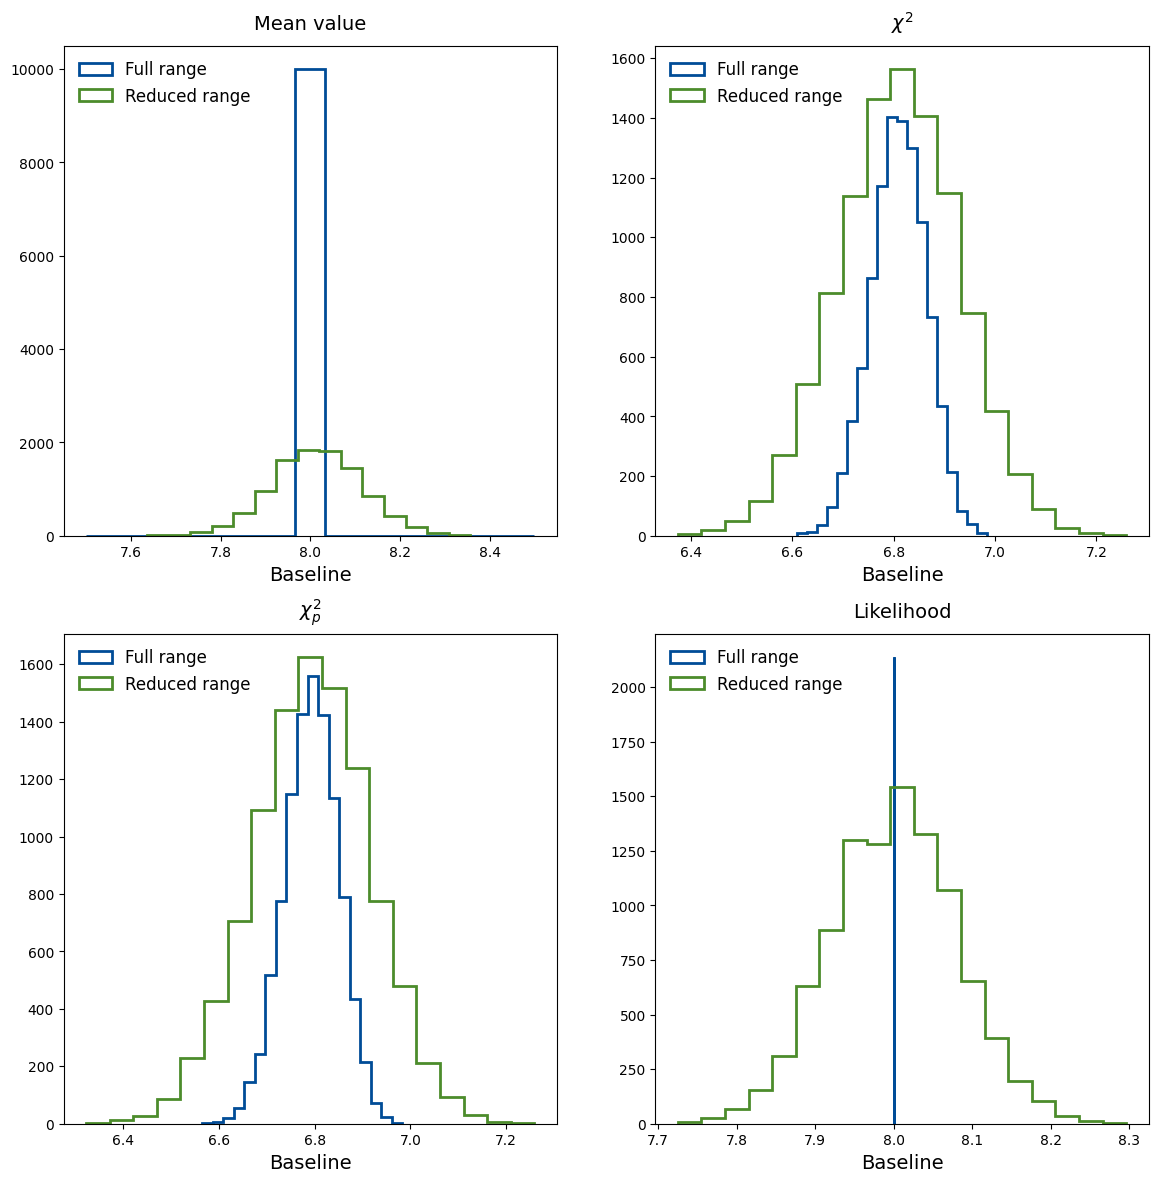

In [10]:
fig, ax = plt.subplots(2, 2, figsize = (14,14))

ax[0,0].hist(tree_2w_r1.bs_mean, bins=15, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid',  label = 'Full range')
ax[0,1].hist(tree_2w_r1.bs_chi, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid', label = 'Full range')
ax[1,0].hist(tree_2w_r1.bs_chip, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid', label = 'Full range')
ax[1,1].hist(tree_2w_r1.bs_LL, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid', label = 'Full range')


ax[0,0].hist(tree_2w_r2.bs_mean, bins=15, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid',  label = 'Reduced range')
ax[0,1].hist(tree_2w_r2.bs_chi, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid', label = 'Reduced range')
ax[1,0].hist(tree_2w_r2.bs_chip, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid', label = 'Reduced range')
ax[1,1].hist(tree_2w_r2.bs_LL, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid', label = 'Reduced range')


for i in range(0,2):
    for j in range(0,2):
        ax[i,j].set_xlabel("Baseline", fontsize=14)
        ax[i,j].legend(loc='upper left', frameon=False, fontsize=12)

#set_ticks(ax[0,0], 0.005, 2000)
#set_ticks(ax[0,1], 0.1, 2000)
#set_ticks(ax[1,0], 0.1, 2000)
#set_ticks(ax[1,1], 0.00005, 2000)


ax[0,0].set_title(labels[0], fontsize = 14, pad = 12)
ax[0,1].set_title(labels[1], fontsize = 14, pad = 12)
ax[1,0].set_title(labels[2], fontsize = 14, pad = 12)
ax[1,1].set_title(labels[3], fontsize = 14, pad = 12)

fig.savefig("2week_bs.pdf")
plt.show()

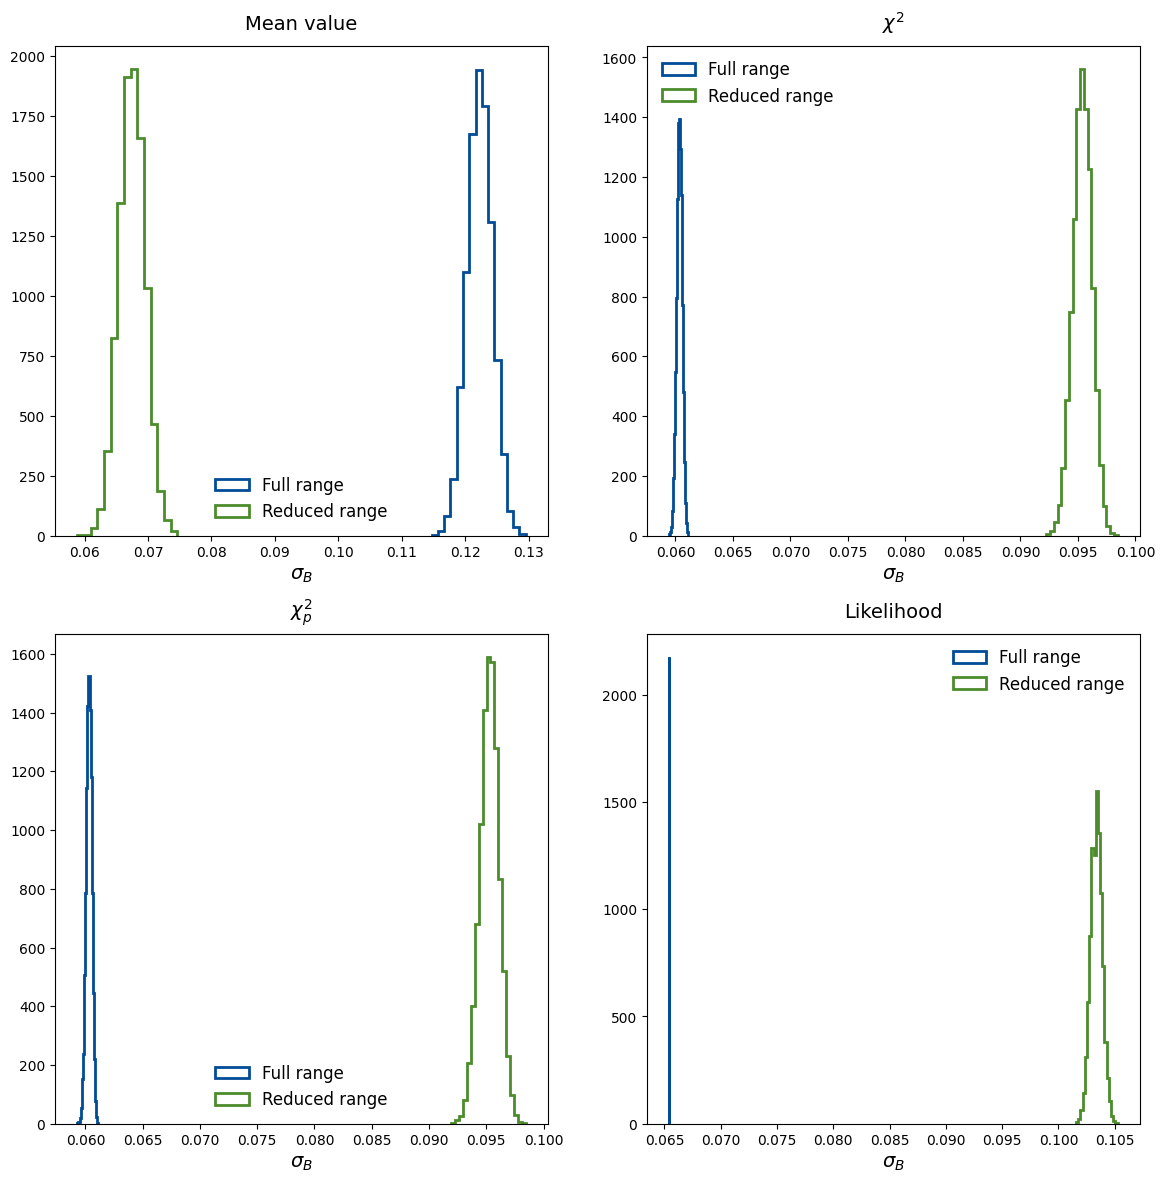

In [11]:
fig, ax = plt.subplots(2, 2, figsize = (14,14))

ax[0,0].hist(tree_2w_r1.bs_mean_err, bins=15, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid',  label = 'Full range')
ax[0,1].hist(tree_2w_r1.bs_chi_err, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid', label = 'Full range')
ax[1,0].hist(tree_2w_r1.bs_chip_err, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid', label = 'Full range')
ax[1,1].hist(tree_2w_r1.bs_LL_err, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid', label = 'Full range')


ax[0,0].hist(tree_2w_r2.bs_mean_err, bins=15, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid',  label = 'Reduced range')
ax[0,1].hist(tree_2w_r2.bs_chi_err, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid', label = 'Reduced range')
ax[1,0].hist(tree_2w_r2.bs_chip_err, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid', label = 'Reduced range')
ax[1,1].hist(tree_2w_r2.bs_LL_err, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid', label = 'Reduced range')


for i in range(0,2):
    for j in range(0,2):
        ax[i,j].set_xlabel("$\sigma_B$", fontsize=14)
        ax[i,j].legend(loc='best', frameon=False, fontsize=12)

#set_ticks(ax[0,0], 0.005, 2000)
#set_ticks(ax[0,1], 0.01, 2000)
#set_ticks(ax[1,0], 0.01, 2000)
#set_ticks(ax[1,1], 0.01, 2000)

ax[1,1].ticklabel_format(axis='x', style='sci', scilimits=(-5,0))

ax[0,0].set_title(labels[0], fontsize = 14, pad = 12)
ax[0,1].set_title(labels[1], fontsize = 14, pad = 12)
ax[1,0].set_title(labels[2], fontsize = 14, pad = 12)
ax[1,1].set_title(labels[3], fontsize = 14, pad = 12)

fig.savefig("2week_sigmabs.pdf")
plt.show()


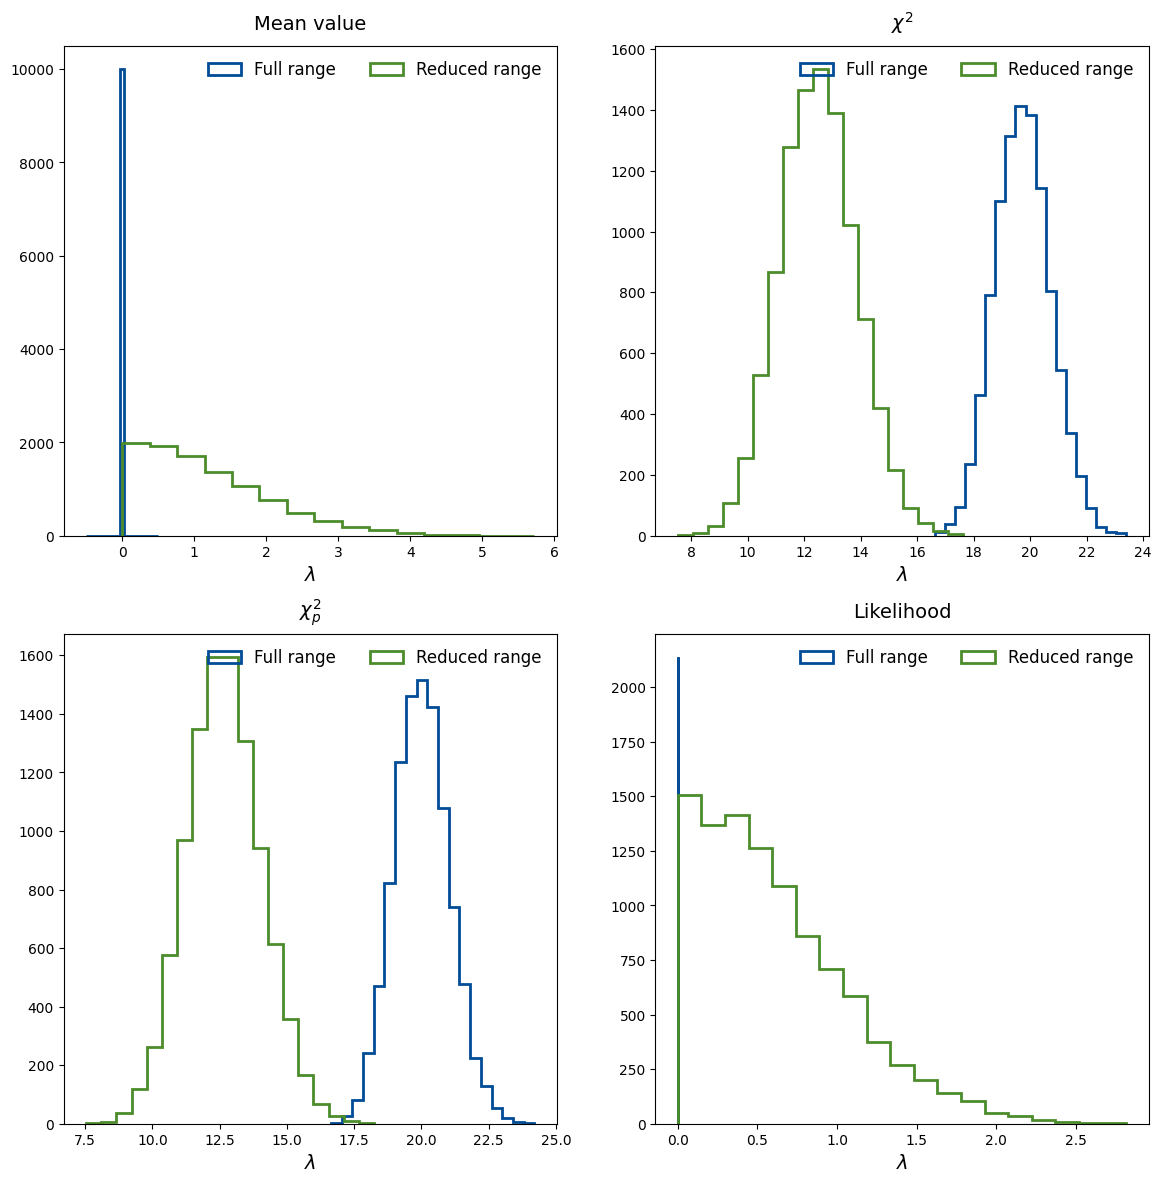

In [13]:
fig, ax = plt.subplots(2, 2, figsize = (14,14))

ax[0,0].hist(tree_2w_r1.delta_mean, bins=15, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid',  label = 'Full range')
ax[0,1].hist(tree_2w_r1.delta_chi, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid', label = 'Full range')
ax[1,0].hist(tree_2w_r1.delta_chip, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid', label = 'Full range')
ax[1,1].hist(tree_2w_r1.delta_L, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid', label = 'Full range')


n, bins, _ = ax[0,0].hist(tree_2w_r2.delta_mean, bins=15, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid',  label = 'Reduced range')
ax[0,1].hist(tree_2w_r2.delta_chi, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid', label = 'Reduced range')
ax[1,0].hist(tree_2w_r2.delta_chip, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid', label = 'Reduced range')
ax[1,1].hist(tree_2w_r2.delta_L, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid', label = 'Reduced range')


for i in range(0,2):
    for j in range(0,2):
        ax[i,j].set_xlabel("$\\lambda$", fontsize=14)
        ax[i,j].legend(loc='best', frameon=False, fontsize=12, ncol = 2)

#set_ticks(ax[0,0], 0.2, 2000)
#set_ticks(ax[0,1], 2, 2000)
#set_ticks(ax[1,0], 2, 2000)
#set_ticks(ax[1,1], 0.0002, 2000)

ax[1,1].ticklabel_format(axis='x', style='sci', scilimits=(-5,0))

ax[0,0].set_title(labels[0], fontsize = 14, pad = 12)
ax[0,1].set_title(labels[1], fontsize = 14, pad = 12)
ax[1,0].set_title(labels[2], fontsize = 14, pad = 12)
ax[1,1].set_title(labels[3], fontsize = 14, pad = 12)

fig.savefig("2week_lambda.pdf")
plt.show()


In [14]:
np.sum(n[8:])/np.sum(n)

0.0411

## 3 WEEKS

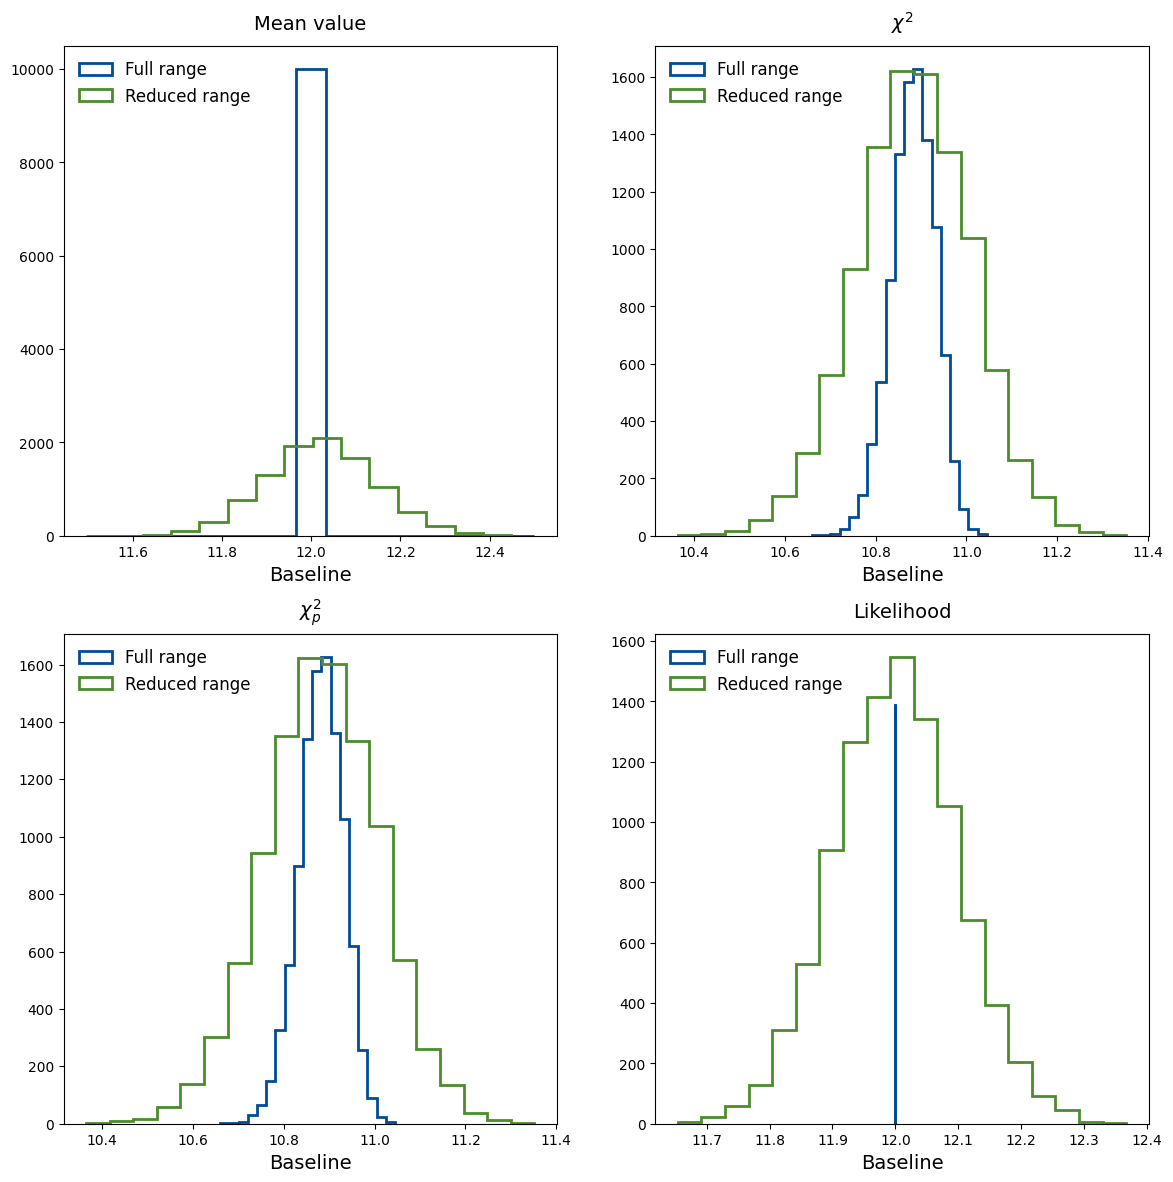

In [16]:
fig, ax = plt.subplots(2, 2, figsize = (14,14))

ax[0,0].hist(tree_3w_r1.bs_mean, bins=15, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid',  label = 'Full range')
ax[0,1].hist(tree_3w_r1.bs_chi, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid', label = 'Full range')
ax[1,0].hist(tree_3w_r1.bs_chip, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid', label = 'Full range')
ax[1,1].hist(tree_3w_r1.bs_LL, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid', label = 'Full range')


ax[0,0].hist(tree_3w_r2.bs_mean, bins=15, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid',  label = 'Reduced range')
ax[0,1].hist(tree_3w_r2.bs_chi, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid', label = 'Reduced range')
ax[1,0].hist(tree_3w_r2.bs_chip, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid', label = 'Reduced range')
ax[1,1].hist(tree_3w_r2.bs_LL, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid', label = 'Reduced range')


for i in range(0,2):
    for j in range(0,2):
        ax[i,j].set_xlabel("Baseline", fontsize=14)
        ax[i,j].legend(loc='upper left', frameon=False, fontsize=12)

#set_ticks(ax[0,0], 0.01, 2000)
#set_ticks(ax[0,1], 0.1, 2000)
#set_ticks(ax[1,0], 0.1, 2000)
#set_ticks(ax[1,1], 0.00004, 2000)


ax[0,0].set_title(labels[0], fontsize = 14, pad = 12)
ax[0,1].set_title(labels[1], fontsize = 14, pad = 12)
ax[1,0].set_title(labels[2], fontsize = 14, pad = 12)
ax[1,1].set_title(labels[3], fontsize = 14, pad = 12)

fig.savefig("3week_bs.pdf")
plt.show()

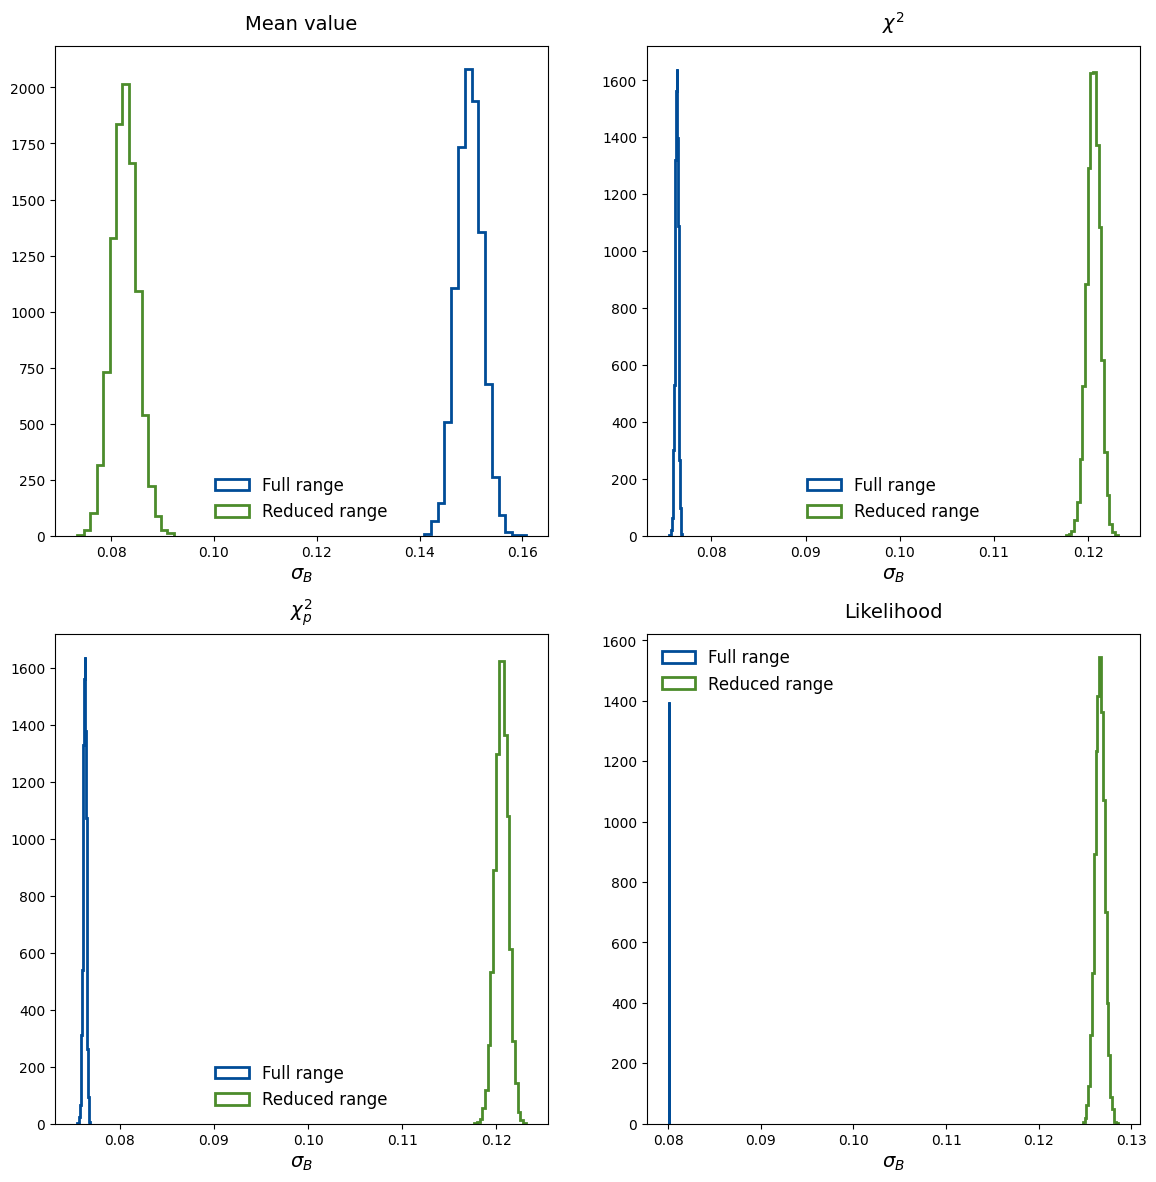

In [17]:
fig, ax = plt.subplots(2, 2, figsize = (14,14))

ax[0,0].hist(tree_3w_r1.bs_mean_err, bins=15, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid',  label = 'Full range')
ax[0,1].hist(tree_3w_r1.bs_chi_err, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid', label = 'Full range')
ax[1,0].hist(tree_3w_r1.bs_chip_err, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid', label = 'Full range')
ax[1,1].hist(tree_3w_r1.bs_LL_err, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid', label = 'Full range')


ax[0,0].hist(tree_3w_r2.bs_mean_err, bins=15, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid',  label = 'Reduced range')
ax[0,1].hist(tree_3w_r2.bs_chi_err, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid', label = 'Reduced range')
ax[1,0].hist(tree_3w_r2.bs_chip_err, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid', label = 'Reduced range')
ax[1,1].hist(tree_3w_r2.bs_LL_err, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid', label = 'Reduced range')


for i in range(0,2):
    for j in range(0,2):
        ax[i,j].set_xlabel("$\sigma_B$", fontsize=14)
        ax[i,j].legend(loc='best', frameon=False, fontsize=12)

#set_ticks(ax[0,0], 0.005, 2000)
#set_ticks(ax[0,1], 0.01, 2000)
#set_ticks(ax[1,0], 0.01, 2000)
#set_ticks(ax[1,1], 0.01, 2000)

ax[1,1].ticklabel_format(axis='x', style='sci', scilimits=(-5,0))

ax[0,0].set_title(labels[0], fontsize = 14, pad = 12)
ax[0,1].set_title(labels[1], fontsize = 14, pad = 12)
ax[1,0].set_title(labels[2], fontsize = 14, pad = 12)
ax[1,1].set_title(labels[3], fontsize = 14, pad = 12)

fig.savefig("3week_sigmabs.pdf")
plt.show()


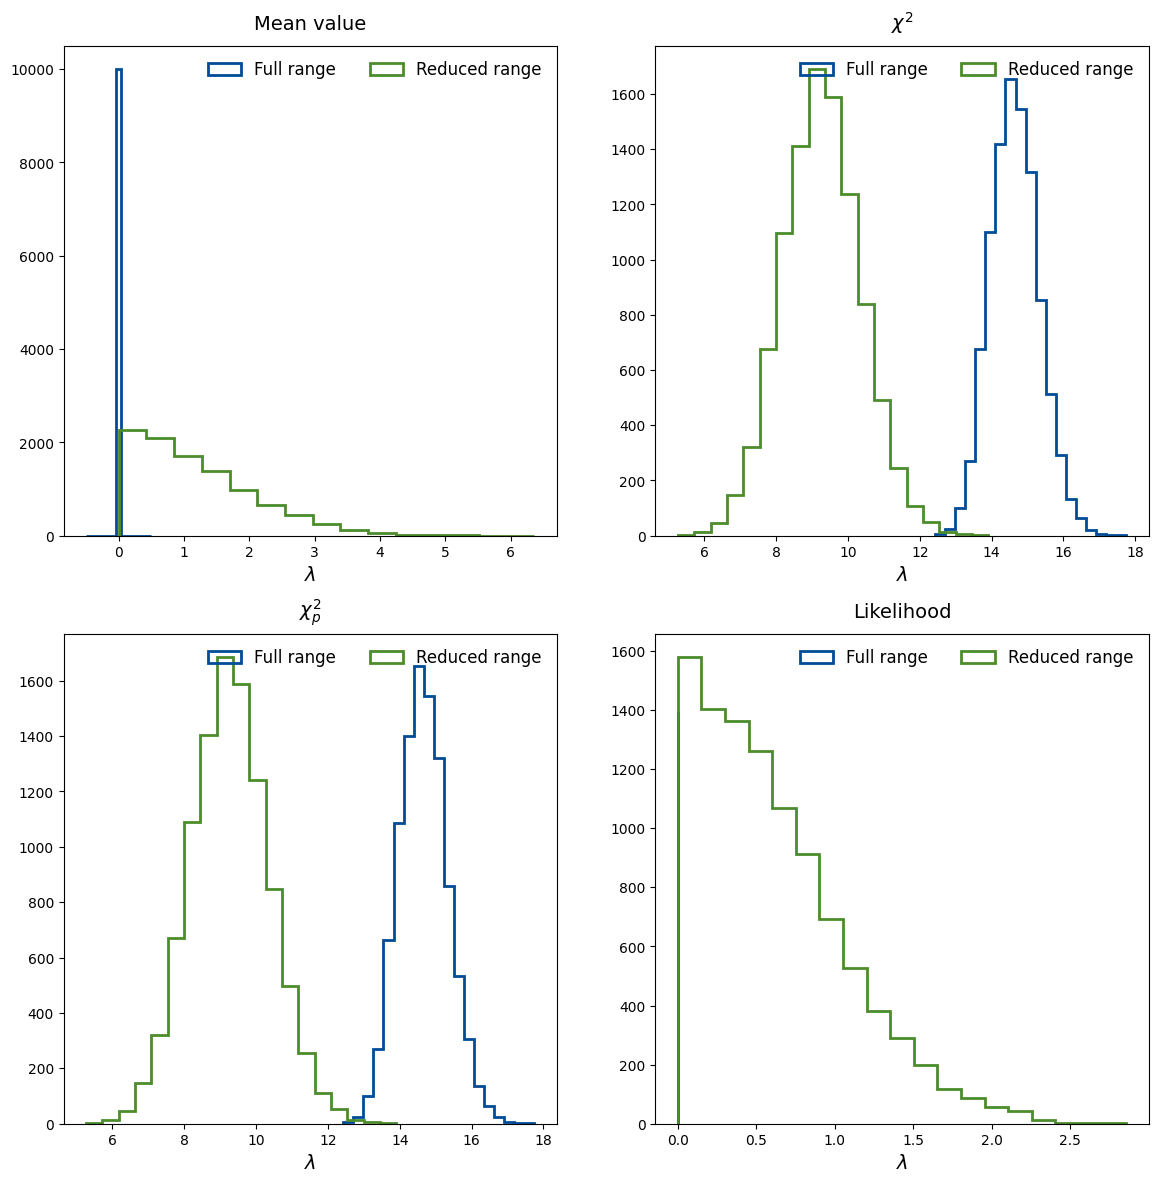

In [18]:
fig, ax = plt.subplots(2, 2, figsize = (14,14))

ax[0,0].hist(tree_3w_r1.delta_mean, bins=15, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid',  label = 'Full range')
ax[0,1].hist(tree_3w_r1.delta_chi, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid', label = 'Full range')
ax[1,0].hist(tree_3w_r1.delta_chip, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid', label = 'Full range')
ax[1,1].hist(tree_3w_r1.delta_L, bins=19, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid', label = 'Full range')


ax[0,0].hist(tree_3w_r2.delta_mean, bins=15, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid',  label = 'Reduced range')
ax[0,1].hist(tree_3w_r2.delta_chi, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid', label = 'Reduced range')
ax[1,0].hist(tree_3w_r2.delta_chip, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid', label = 'Reduced range')
ax[1,1].hist(tree_3w_r2.delta_L, bins=19, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid', label = 'Reduced range')


for i in range(0,2):
    for j in range(0,2):
        ax[i,j].set_xlabel("$\\lambda$", fontsize=14)
        ax[i,j].legend(loc='best', frameon=False, fontsize=12, ncol = 2)

#set_ticks(ax[0,0], 0.2, 2000)
#set_ticks(ax[0,1], 2, 2000)
#set_ticks(ax[1,0], 2, 2000)
#set_ticks(ax[1,1], 0.0002, 2000)

ax[1,1].ticklabel_format(axis='x', style='sci', scilimits=(-5,0))

ax[0,0].set_title(labels[0], fontsize = 14, pad = 12)
ax[0,1].set_title(labels[1], fontsize = 14, pad = 12)
ax[1,0].set_title(labels[2], fontsize = 14, pad = 12)
ax[1,1].set_title(labels[3], fontsize = 14, pad = 12)

fig.savefig("3week_lambda.pdf")
plt.show()


## Mean value

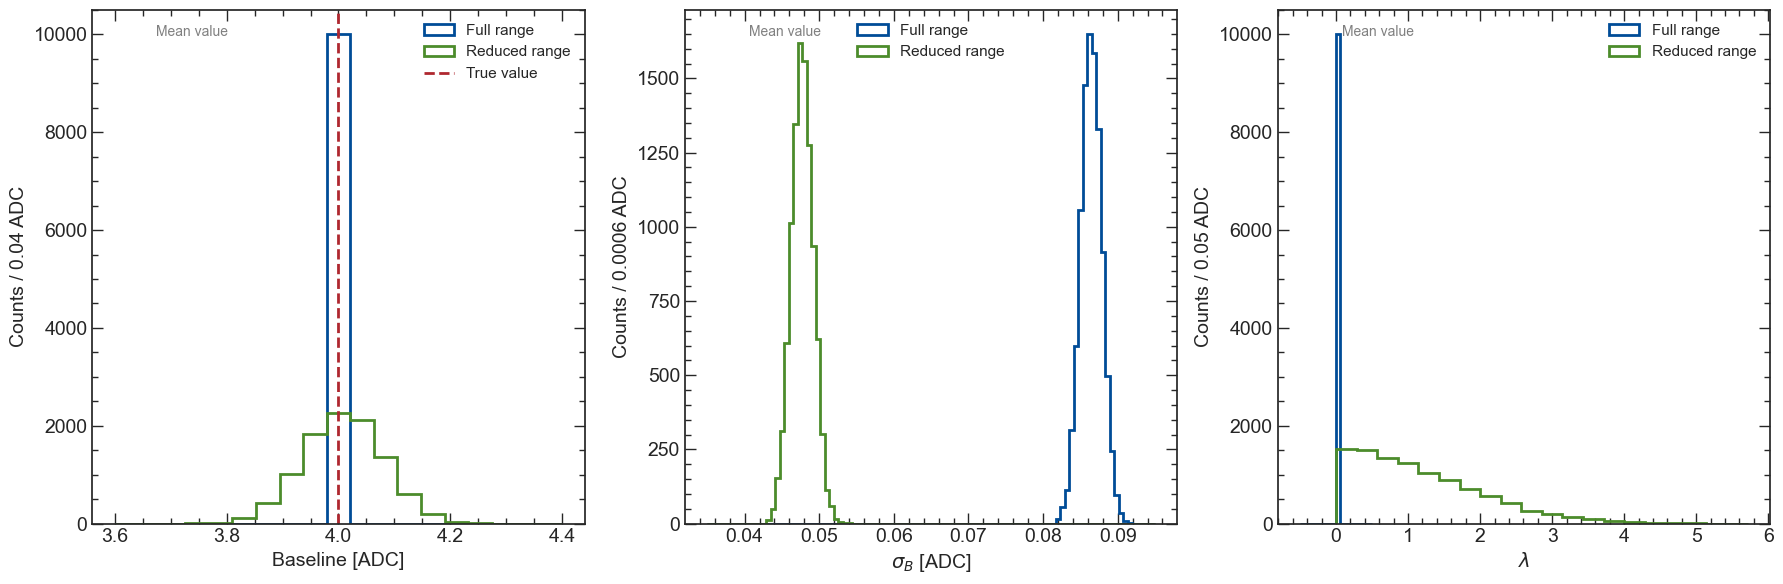

In [8]:
fig, ax = plt.subplots(1, 3, figsize = (18,6))

nbins = np.linspace(3.6,4.4,20)

n1, bins1, _ = ax[0].hist(tree_1w_r1.bs_mean, bins=nbins, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid',  label = 'Full range')
n2, bins2, _ = ax[0].hist(tree_1w_r2.bs_mean, bins=nbins, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid',  label = 'Reduced range')
ax[0].axvline(bs_1w, lw = 2, ls = '--', color = '#AF272F', label = 'True value')

w1 = bins1[1] - bins1[0]
w2 = bins2[1] - bins2[0]

ax[0].set_xlabel("Baseline [ADC]", fontsize=14)
ax[0].set_ylabel("Counts / %1.2f ADC" %w1, fontsize=14)

## ------  ##
nbins = np.linspace(0.035,0.095,100)

n1, bins1, _ = ax[1].hist(tree_1w_r1.bs_mean_err, bins=nbins, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid',  label = 'Full range')
n2, bins2, _ = ax[1].hist(tree_1w_r2.bs_mean_err, bins=nbins, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid',  label = 'Reduced range')

w1 = bins1[1] - bins1[0]
w2 = bins2[1] - bins2[0]

ax[1].set_xlabel("$\sigma_B$ [ADC]", fontsize=14)
ax[1].set_ylabel("Counts / %1.4f ADC" %w1, fontsize=14)

## ------  ##
nbins = np.linspace(0,6,100)

n1, bins1, _ = ax[2].hist(tree_1w_r1.delta_mean, bins=20, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid',  label = 'Full range')
n2, bins2, _ = ax[2].hist(tree_1w_r2.delta_mean, bins=20, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid',  label = 'Reduced range')

w1 = bins1[1] - bins1[0]
w2 = bins2[1] - bins2[0]

ax[2].set_xlabel("$\\lambda$", fontsize=14)
ax[2].set_ylabel("Counts / %1.2f ADC" %w1, fontsize=14)



ax[0].legend(loc='best', frameon=False, fontsize=11)
ax[1].legend(loc='upper center', frameon=False, fontsize=11)
ax[2].legend(loc='best', frameon=False, fontsize=11)

for i in range(0,3):
    ax[i].text(0.13, 0.95, labels[0], fontsize = 10, transform = ax[i].transAxes, color = 'gray')


set_ticks(ax[0], 0.2, 2000)
set_ticks(ax[1], 0.01, 250)
set_ticks(ax[2], 1, 2000)


fig.tight_layout()
fig.savefig("./plots/bs_meanvalue.pdf")
plt.show()

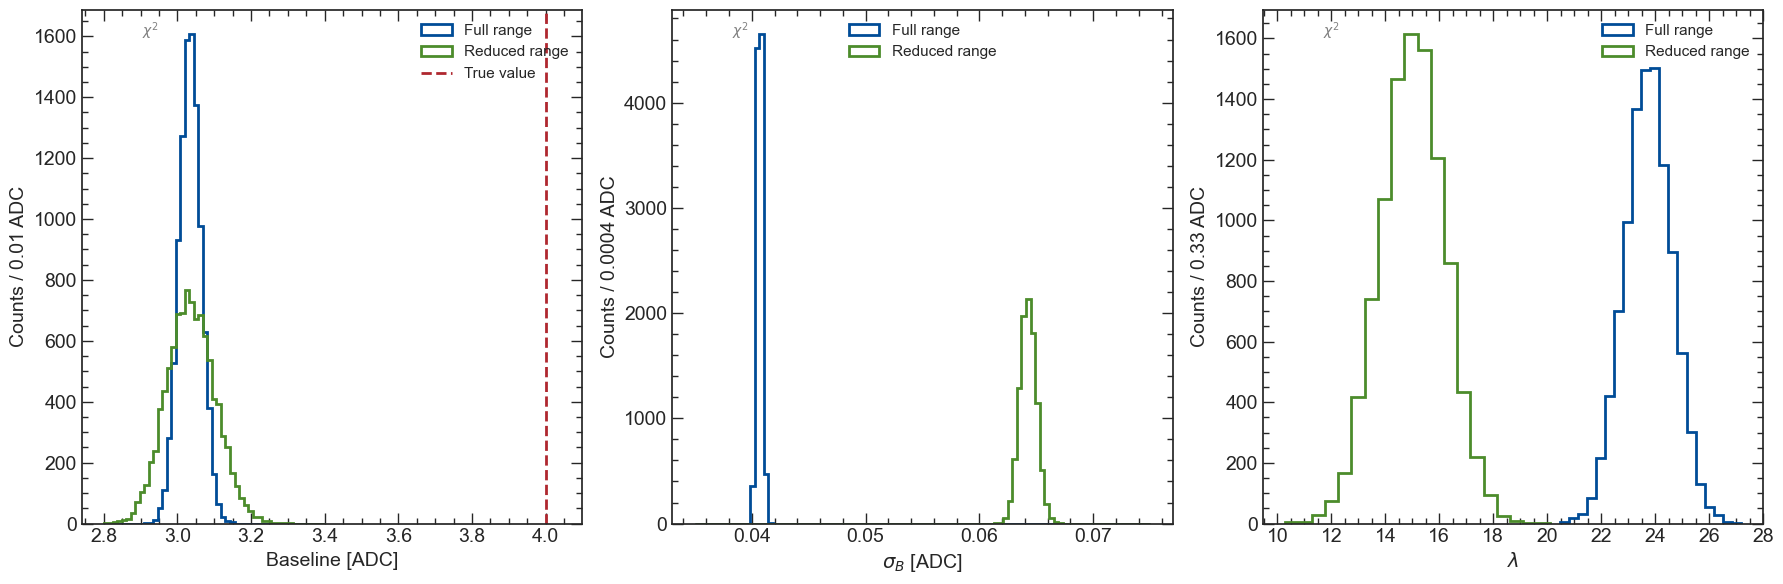

In [11]:
fig, ax = plt.subplots(1, 3, figsize = (18,6))

nbins = np.linspace(2.8,3.4,50)

n1, bins1, _ = ax[0].hist(tree_1w_r1.bs_chi, bins=nbins, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid',  label = 'Full range')
n2, bins2, _ = ax[0].hist(tree_1w_r2.bs_chi, bins=nbins, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid',  label = 'Reduced range')
ax[0].axvline(bs_1w, lw = 2, ls = '--', color = '#AF272F', label = 'True value')
ax[0].set_xlim(right = 4.1)

w1 = bins1[1] - bins1[0]
w2 = bins2[1] - bins2[0]

ax[0].set_xlabel("Baseline [ADC]", fontsize=14)
ax[0].set_ylabel("Counts / %1.2f ADC" %w1, fontsize=14)

## ------  ##
nbins = np.linspace(0.035,0.075,100)

n1, bins1, _ = ax[1].hist(tree_1w_r1.bs_chi_err, bins=nbins, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid',  label = 'Full range')
n2, bins2, _ = ax[1].hist(tree_1w_r2.bs_chi_err, bins=nbins, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid',  label = 'Reduced range')

w1 = bins1[1] - bins1[0]
w2 = bins2[1] - bins2[0]

ax[1].set_xlabel("$\sigma_B$ [ADC]", fontsize=14)
ax[1].set_ylabel("Counts / %1.4f ADC" %w1, fontsize=14)

## ------  ##
nbins = np.linspace(10,28,120)

n1, bins1, _ = ax[2].hist(tree_1w_r1.delta_chi, bins=20, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid',  label = 'Full range')
n2, bins2, _ = ax[2].hist(tree_1w_r2.delta_chi, bins=20, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid',  label = 'Reduced range')

w1 = bins1[1] - bins1[0]
w2 = bins2[1] - bins2[0]

ax[2].set_xlabel("$\\lambda$", fontsize=14)
ax[2].set_ylabel("Counts / %1.2f ADC" %w1, fontsize=14)



ax[0].legend(loc='best', frameon=False, fontsize=11)
ax[1].legend(loc='upper center', frameon=False, fontsize=11)
ax[2].legend(loc='best', frameon=False, fontsize=11)

   
for i in range(0,3):
    ax[i].text(0.12, 0.95, labels[1], fontsize = 10, transform = ax[i].transAxes, color = 'gray')

set_ticks(ax[0], 0.2, 200)
set_ticks(ax[1], 0.01, 1000)
set_ticks(ax[2], 2, 200)


fig.tight_layout()
fig.savefig("./plots/bs_chivalue.pdf")
plt.show()

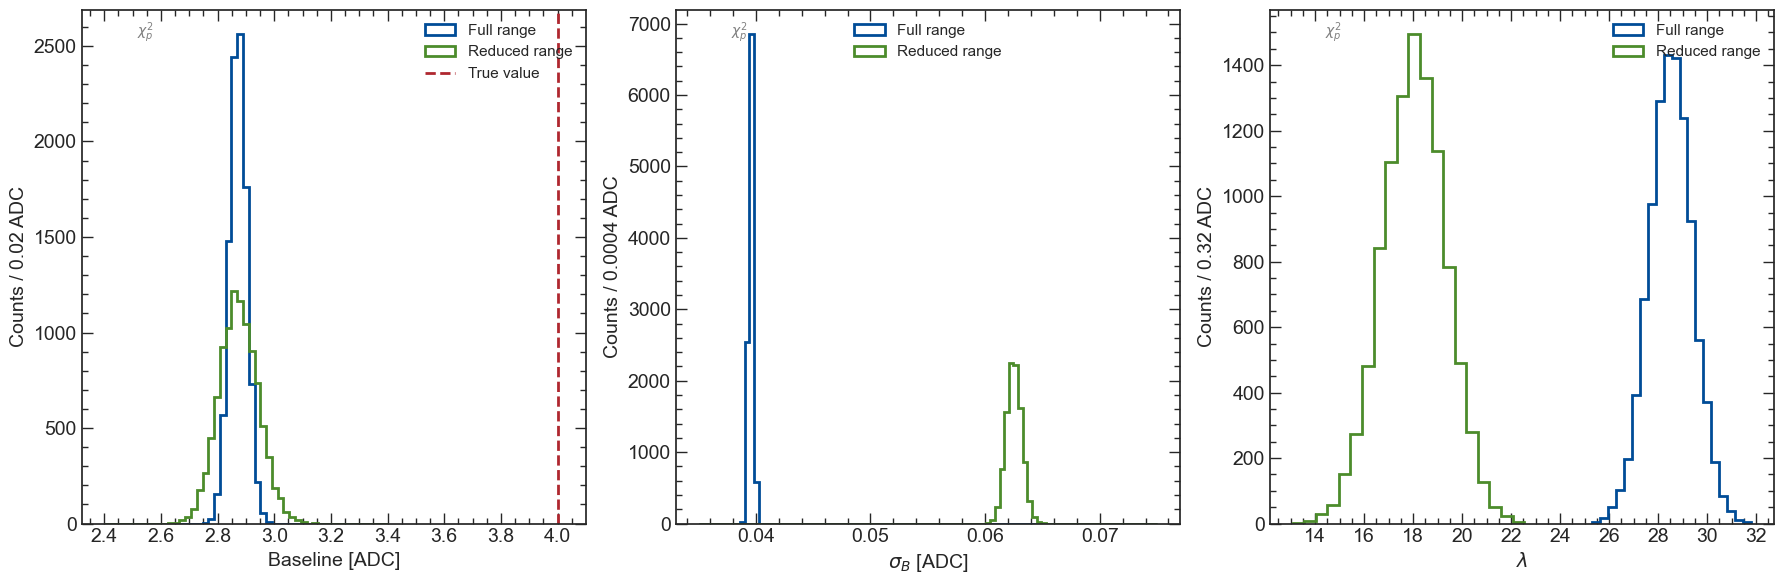

In [13]:
fig, ax = plt.subplots(1, 3, figsize = (18,6))

nbins = np.linspace(2.4,3.4,50)

n1, bins1, _ = ax[0].hist(tree_1w_r1.bs_chip, bins=nbins, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid',  label = 'Full range')
n2, bins2, _ = ax[0].hist(tree_1w_r2.bs_chip, bins=nbins, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid',  label = 'Reduced range')
ax[0].axvline(bs_1w, lw = 2, ls = '--', color = '#AF272F', label = 'True value')
ax[0].set_xlim(right = 4.1)

w1 = bins1[1] - bins1[0]
w2 = bins2[1] - bins2[0]

ax[0].set_xlabel("Baseline [ADC]", fontsize=14)
ax[0].set_ylabel("Counts / %1.2f ADC" %w1, fontsize=14)

## ------  ##
nbins = np.linspace(0.035,0.075,100)

n1, bins1, _ = ax[1].hist(tree_1w_r1.bs_chip_err, bins=nbins, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid',  label = 'Full range')
n2, bins2, _ = ax[1].hist(tree_1w_r2.bs_chip_err, bins=nbins, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid',  label = 'Reduced range')

w1 = bins1[1] - bins1[0]
w2 = bins2[1] - bins2[0]

ax[1].set_xlabel("$\sigma_B$ [ADC]", fontsize=14)
ax[1].set_ylabel("Counts / %1.4f ADC" %w1, fontsize=14)

## ------  ##
nbins = np.linspace(10,28,120)

n1, bins1, _ = ax[2].hist(tree_1w_r1.delta_chip, bins=20, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid',  label = 'Full range')
n2, bins2, _ = ax[2].hist(tree_1w_r2.delta_chip, bins=20, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid',  label = 'Reduced range')

w1 = bins1[1] - bins1[0]
w2 = bins2[1] - bins2[0]

ax[2].set_xlabel("$\\lambda$", fontsize=14)
ax[2].set_ylabel("Counts / %1.2f ADC" %w1, fontsize=14)


ax[0].legend(loc='best', frameon=False, fontsize=11)
ax[1].legend(loc='upper center', frameon=False, fontsize=11)
ax[2].legend(loc='best', frameon=False, fontsize=11)

   
for i in range(0,3):
    ax[i].text(0.11, 0.95, labels[2], fontsize = 10, transform = ax[i].transAxes, color = 'gray')

set_ticks(ax[0], 0.2, 500)
set_ticks(ax[1], 0.01, 1000)
set_ticks(ax[2], 2, 200)


fig.tight_layout()
fig.savefig("./plots/bs_chipvalue.pdf")
plt.show()

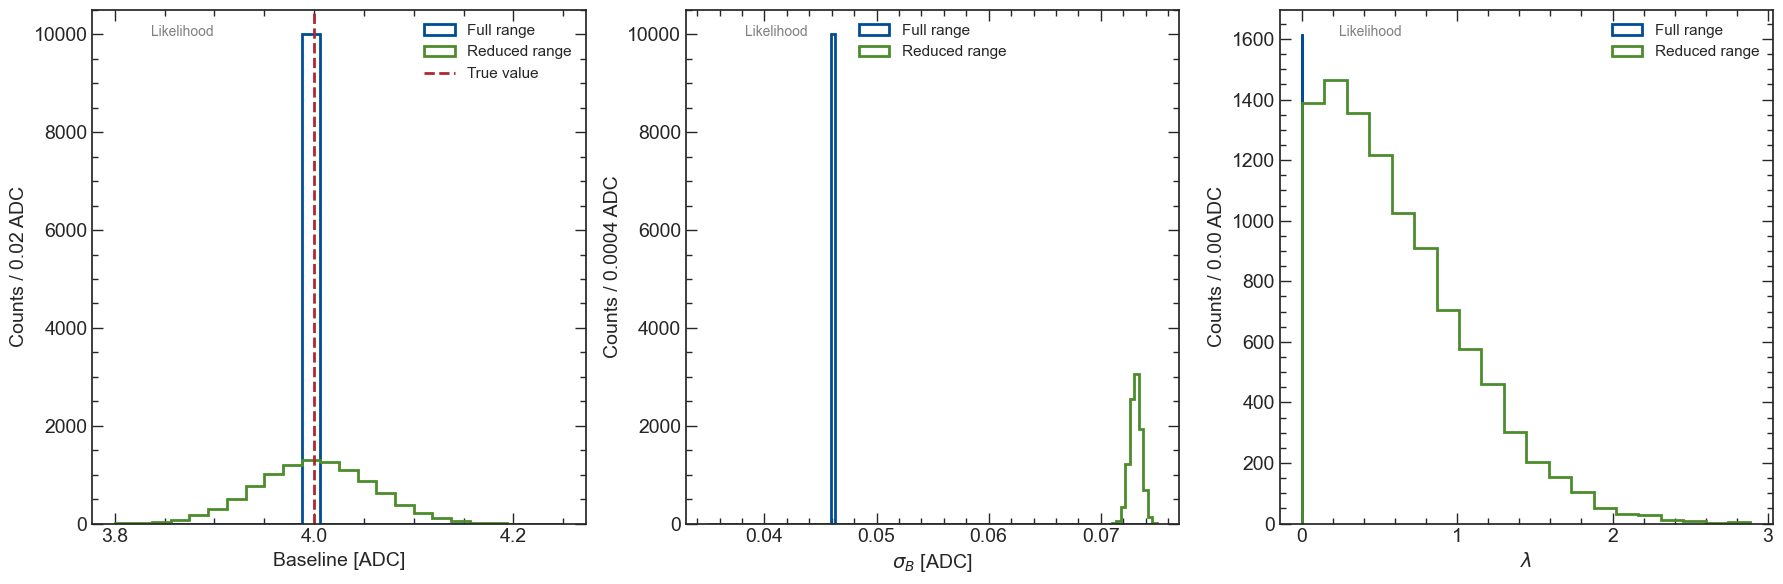

In [17]:
fig, ax = plt.subplots(1, 3, figsize = (18,6))

nbins = np.linspace(3.8,4.25,25)

n1, bins1, _ = ax[0].hist(tree_1w_r1.bs_LL, bins=nbins, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid',  label = 'Full range')
n2, bins2, _ = ax[0].hist(tree_1w_r2.bs_LL, bins=nbins, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid',  label = 'Reduced range')
ax[0].axvline(bs_1w, lw = 2, ls = '--', color = '#AF272F', label = 'True value')


w1 = bins1[1] - bins1[0]
w2 = bins2[1] - bins2[0]

ax[0].set_xlabel("Baseline [ADC]", fontsize=14)
ax[0].set_ylabel("Counts / %1.2f ADC" %w1, fontsize=14)

## ------  ##
nbins = np.linspace(0.035,0.075,100)

n1, bins1, _ = ax[1].hist(tree_1w_r1.bs_LL_err, bins=nbins, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid',  label = 'Full range')
n2, bins2, _ = ax[1].hist(tree_1w_r2.bs_LL_err, bins=nbins, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid',  label = 'Reduced range')

w1 = bins1[1] - bins1[0]
w2 = bins2[1] - bins2[0]

ax[1].set_xlabel("$\sigma_B$ [ADC]", fontsize=14)
ax[1].set_ylabel("Counts / %1.4f ADC" %w1, fontsize=14)

## ------  ##
nbins = np.linspace(10,28,120)

n1, bins1, _ = ax[2].hist(tree_1w_r1.delta_L, bins=20, histtype='step', ec = '#004C97', lw=2, alpha=1, align = 'mid',  label = 'Full range')
n2, bins2, _ = ax[2].hist(tree_1w_r2.delta_L, bins=20, histtype='step', ec = '#4C8C2B', lw=2, alpha=1, align = 'mid',  label = 'Reduced range')

w1 = bins1[1] - bins1[0]
w2 = bins2[1] - bins2[0]

ax[2].set_xlabel("$\\lambda$", fontsize=14)
ax[2].set_ylabel("Counts / %1.2f ADC" %w1, fontsize=14)


ax[0].legend(loc='best', frameon=False, fontsize=11)
ax[1].legend(loc='upper center', frameon=False, fontsize=11)
ax[2].legend(loc='best', frameon=False, fontsize=11)

   
for i in range(0,3):
    ax[i].text(0.12, 0.95, labels[3], fontsize = 10, transform = ax[i].transAxes, color = 'gray')

set_ticks(ax[0], 0.2, 2000)
set_ticks(ax[1], 0.01, 2000)
set_ticks(ax[2], 1, 200)


fig.tight_layout()
fig.savefig("./plots/bs_LL.pdf")
plt.show()